In [19]:
import numpy as np
import pandas as pd
from pandas import DataFrame
import sqlite3
import matplotlib.pyplot as plt
import ast
import math
import time
from datetime import datetime
import glob
import sys
import copy
import cv2
from imp import reload

# read in db flyProjects to get experimetns at 45° 20_01_07


In [95]:
conn = sqlite3.connect("/home/bianca/Documents/github/locustVR/databases/locustProjects_20_01_07.db")
query2 = "SELECT  post0,exp,replicate, nStimuli  FROM projects;" #
readin_angle = pd.read_sql_query(query2,conn)


readin_angle['index'] = list(range(len(readin_angle.index)))

tab2=pd.DataFrame()
#readin_angle.head(10)

#['position','angle','distance']

dist_read = False
print('readin_anglekeys',readin_angle.keys())
#60 degree angle
angle60=(math.pi/180*60)
angle30=(math.pi/180*30)
angle45=(math.pi/180*45)
angle180=(math.pi)

a=True
#p= pd.DataFrame(readin_angle,l)#.T.to_dict()
for i in range(0,250):
    
    #(readin_angle[readin_angle['index'] == i])
    #250 diff conditions from which to pick available
    
    
    
    if (ast.literal_eval(readin_angle.loc[i].values[0])) != None:
        ang=(ast.literal_eval(readin_angle.loc[i].values[0])['angle'])
        
        if dist_read == False:
            dist = (ast.literal_eval(readin_angle.loc[i].values[0])['distance'])
            dist_read = True
        if readin_angle['exp'][i] <10: 
            #only experiments <10 are the exp with two post condition, >10 are 3 post cond
            #print(readin_angle['exp'][i])
            #if 
            if ang == angle45 and readin_angle['nStimuli'][i]  <4 and readin_angle['nStimuli'][i] >0:
                angle_used = ang
                    #selects for 60° cond and without nstim==0 or ==4 (controls with one post cond)
                    #print(i,ang)
                    #readin_angle[i]
                    #del tab
                    #print(readin_angle[readin_angle['index'] == i])
                    #Liste2=Liste2.append(readin_angle[readin_angle['index'] == i])
                #print(ast.literal_eval(readin_angle.loc[i].values[0])['position'])
                tab=(readin_angle[readin_angle['index'] == i])
                tab2=tab2.append(tab,ignore_index=True)
                if readin_angle['nStimuli'][i]  <4 and readin_angle['nStimuli'][i] >0:
                    #print(readin_angle['nStimuli'][i])
                    pass
            #if ang == angle30 readin_angle['nStimuli'][i]  <4 and readin_angle['nStimuli'][i] >0:
                
  
                
#readin_angle
#ang

#print(tab2.count())
#print('tab2keys',tab2.keys())
#print(dist)
#print(ang, angle_used)
#tab2



('readin_anglekeys', Index([u'post0', u'exp', u'replicate', u'nStimuli', u'index'], dtype='object'))


# EXPERIMENT ID READIN

In [21]:
conn = sqlite3.connect("/home/bianca/Documents/github/locustVR/databases/locustExperiments_20_01_07.db")

query = "SELECT exp, replicate, date,tStart, expId FROM experiments;"
readin_id = pd.read_sql_query(query,conn)
print(readin_id.keys())
readin_id=readin_id.assign(nStimuli = 5)
#posi=(ast.literal_eval(readin_angle.loc[0].values[0])['position'])
#posi=0
readin_id=readin_id.assign(position_post0_x = 1.0)
readin_id=readin_id.assign(position_post0_y = 1.0)

#ang=(ast.literal_eval(readin_angle.loc[i].values[0])['angle'])

for i in range(0,len(readin_id.index)):
    #iterate through 40 rows of readin_id
    
    #kombi exp+ replicate in tab2 abgleichen und nStimuli rausschreiben!)
    b=readin_id['exp'][i]
    c=readin_id['replicate'][i]
    e=readin_id['date'][i]
    #tstart=readin_id['tStart'][i]
 
    for d in range(len(tab2)):
        #iterate through 50 rows of tab2
        if tab2['exp'][d]==b and tab2['replicate'][d]==c:
            #print(tab2['exp'][d], tab2['replicate'][d], tab2['nStimuli'][d]  )
            
            #print(tab2['nStimuli'][d])
            f=tab2['nStimuli'][d]
            #g=tab2['post0']
            g=(ast.literal_eval(tab2.loc[d].values[0])['position'])
            h=round(g[0], 2)
            k=round(g[1], 2)
            #print(g.keys())
            #print(h,k)
            readin_id['nStimuli'][i]=f
         
            readin_id['position_post0_x'][i]=h
            readin_id['position_post0_y'][i]=k
            
readin_id.reset_index(drop=True, inplace=True) 
#exper_date='2019-12-12'


          
readin_id2= readin_id
readin_id2

#40 expIDs available

Index([u'exp', u'replicate', u'date', u'tStart', u'expId'], dtype='object')


/home/bianca/.local/lib/python2.7/site-packages/ipykernel_launcher.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/bianca/.local/lib/python2.7/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/bianca/.local/lib/python2.7/site-packages/ipykernel_launcher.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,exp,replicate,date,tStart,expId,nStimuli,position_post0_x,position_post0_y
0,0,2,2020-01-07,11:59,c0127c9b-3ff9-4c49-8db4-6900ff4c2b2a,2,-2.00,0.00
1,0,2,2020-01-07,13:06,54a35a9f-9eb0-4404-bc9d-8ed7b71192c5,2,-2.00,0.00
2,0,4,2020-01-07,14:04,7ac51c48-5f5a-4ac3-9930-56772578c1ee,1,-2.00,0.00
3,1,3,2020-01-07,15:30,3a1d5deb-e8f7-48a4-aabb-25456f941c43,1,1.41,1.41
4,1,1,2020-01-08,09:18,752b3218-e802-47e8-bbc6-1049f15e6f85,1,1.41,1.41
5,1,4,2020-01-08,10:17,89c8286e-dd78-4c57-a2c8-9ff7c39ac2f2,1,1.41,1.41
6,2,4,2020-01-08,11:31,13e69b2f-9760-4625-a309-511af2c5afb2,3,-2.00,0.00
7,2,0,2020-01-08,13:12,2a7c4e5b-deb9-4c55-b0f7-2547034b8b4d,3,-2.00,0.00
8,2,0,2020-01-08,14:08,da620536-7437-4bf6-a7de-ba36f19b4177,3,-2.00,0.00
9,3,3,2020-01-08,17:30,acb6ec35-e1e0-450a-98ca-581b0f21723e,1,-1.41,-1.41


# read in db flyProjects to get experimetns at 45° db 19-12-09


In [22]:
conn = sqlite3.connect("/home/bianca/Documents/github/locustVR/databases/locustProjects_19_12_09.db")
query2 = "SELECT  post0,exp,replicate, nStimuli  FROM projects;" #
readin_angle = pd.read_sql_query(query2,conn)

readin_angle['index'] = list(range(len(readin_angle.index)))

tab19_12=pd.DataFrame()
#readin_angle.head(10)

#['position','angle','distance']

dist_read = False
print('readin_anglekeys',readin_angle.keys())
#60 degree angle
angle60=(math.pi/180*60)
angle30=(math.pi/180*30)
angle45=(math.pi/180*45)
angle180=(math.pi)

a=True
#p= pd.DataFrame(readin_angle,l)#.T.to_dict()
for i in range(0,250):
    
    #(readin_angle[readin_angle['index'] == i])
    #250 diff conditions from which to pick available
    
    
    
    if (ast.literal_eval(readin_angle.loc[i].values[0])) != None:
        ang=(ast.literal_eval(readin_angle.loc[i].values[0])['angle'])
        
        if dist_read == False:
            dist = (ast.literal_eval(readin_angle.loc[i].values[0])['distance'])
            dist_read = True
        if readin_angle['exp'][i] <10: 
            #only experiments <10 are the exp with two post condition, >10 are 3 post cond
            #print(readin_angle['exp'][i])
            #if 
            if ang == angle45 and readin_angle['nStimuli'][i]  <4 and readin_angle['nStimuli'][i] >0:
                angle_used = ang
                    #selects for 60° cond and without nstim==0 or ==4 (controls with one post cond)
                    #print(i,ang)
                    #readin_angle[i]
                    #del tab
                    #print(readin_angle[readin_angle['index'] == i])
                    #Liste2=Liste2.append(readin_angle[readin_angle['index'] == i])
                #print(ast.literal_eval(readin_angle.loc[i].values[0])['position'])
                tab=(readin_angle[readin_angle['index'] == i])
                tab19_12=tab19_12.append(tab,ignore_index=True)
                if readin_angle['nStimuli'][i]  <4 and readin_angle['nStimuli'][i] >0:
                    #print(readin_angle['nStimuli'][i])
                    pass
            #if ang == angle30 readin_angle['nStimuli'][i]  <4 and readin_angle['nStimuli'][i] >0:
                
  
                
#readin_angle
#ang

#print(tab2.count())
#print('tab2keys',tab2.keys())
#print(dist)
#print(ang, angle_used)
tab19_12



('readin_anglekeys', Index([u'post0', u'exp', u'replicate', u'nStimuli', u'index'], dtype='object'))


,post0,exp,replicate,nStimuli,index
0,"{'position': (2.0, -4.898587196589413e-16), 'a...",0,0,3,3
1,"{'position': (2.0, -4.898587196589413e-16), 'a...",0,1,3,8
2,"{'position': (2.0, -4.898587196589413e-16), 'a...",0,2,3,13
3,"{'position': (2.0, -4.898587196589413e-16), 'a...",0,3,3,18
4,"{'position': (2.0, -4.898587196589413e-16), 'a...",0,4,1,21
5,"{'position': (1.4142135623730951, 1.4142135623...",1,0,2,27
6,"{'position': (1.4142135623730951, 1.4142135623...",1,1,3,33
7,"{'position': (1.4142135623730951, 1.4142135623...",1,2,2,37
8,"{'position': (1.4142135623730951, 1.4142135623...",1,3,1,41
9,"{'position': (1.4142135623730951, 1.4142135623...",1,4,3,48


# EXPERIMENT ID READIN 19_12

In [23]:
conn = sqlite3.connect("/home/bianca/Documents/github/locustVR/databases/locustExperiments_19_12_09.db")

query = "SELECT exp, replicate, date,tStart, expId FROM experiments;"
readin_id = pd.read_sql_query(query,conn)
print(readin_id.keys())
readin_id=readin_id.assign(nStimuli = 5)
#posi=(ast.literal_eval(readin_angle.loc[0].values[0])['position'])
#posi=0
readin_id=readin_id.assign(position_post0_x = 1.0)
readin_id=readin_id.assign(position_post0_y = 1.0)

#ang=(ast.literal_eval(readin_angle.loc[i].values[0])['angle'])

for i in range(0,len(readin_id.index)):
    #iterate through 40 rows of readin_id
    
    #kombi exp+ replicate in tab19_12 abgleichen und nStimuli rausschreiben!)
    b=readin_id['exp'][i]
    c=readin_id['replicate'][i]
    e=readin_id['date'][i]
    #tstart=readin_id['tStart'][i]
 
    for d in range(len(tab19_12)):
        #iterate through 50 rows of tab2
        if tab19_12['exp'][d]==b and tab2['replicate'][d]==c:
            #print(tab2['exp'][d], tab2['replicate'][d], tab2['nStimuli'][d]  )
            
            #print(tab2['nStimuli'][d])
            f=tab19_12['nStimuli'][d]
            #g=tab2['post0']
            g=(ast.literal_eval(tab19_12.loc[d].values[0])['position'])
            h=round(g[0], 2)
            k=round(g[1], 2)
            #print(g.keys())
            #print(h,k)
            readin_id['nStimuli'][i]=f
         
            readin_id['position_post0_x'][i]=h
            readin_id['position_post0_y'][i]=k
            
readin_id.reset_index(drop=True, inplace=True) 
#exper_date='2019-12-12'


          

readin_id3= readin_id2.append(readin_id, ignore_index=True)
readin_id3
#40 expIDs available

Index([u'exp', u'replicate', u'date', u'tStart', u'expId'], dtype='object')


/home/bianca/.local/lib/python2.7/site-packages/ipykernel_launcher.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/bianca/.local/lib/python2.7/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/bianca/.local/lib/python2.7/site-packages/ipykernel_launcher.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,exp,replicate,date,tStart,expId,nStimuli,position_post0_x,position_post0_y
0,0,2,2020-01-07,11:59,c0127c9b-3ff9-4c49-8db4-6900ff4c2b2a,2,-2.00,0.00
1,0,2,2020-01-07,13:06,54a35a9f-9eb0-4404-bc9d-8ed7b71192c5,2,-2.00,0.00
2,0,4,2020-01-07,14:04,7ac51c48-5f5a-4ac3-9930-56772578c1ee,1,-2.00,0.00
3,1,3,2020-01-07,15:30,3a1d5deb-e8f7-48a4-aabb-25456f941c43,1,1.41,1.41
4,1,1,2020-01-08,09:18,752b3218-e802-47e8-bbc6-1049f15e6f85,1,1.41,1.41
5,1,4,2020-01-08,10:17,89c8286e-dd78-4c57-a2c8-9ff7c39ac2f2,1,1.41,1.41
6,2,4,2020-01-08,11:31,13e69b2f-9760-4625-a309-511af2c5afb2,3,-2.00,0.00
7,2,0,2020-01-08,13:12,2a7c4e5b-deb9-4c55-b0f7-2547034b8b4d,3,-2.00,0.00
8,2,0,2020-01-08,14:08,da620536-7437-4bf6-a7de-ba36f19b4177,3,-2.00,0.00
9,3,3,2020-01-08,17:30,acb6ec35-e1e0-450a-98ca-581b0f21723e,1,-1.41,-1.41


# csv

In [24]:
directory = '/home/bianca/Documents/github/locustVR/databases/data_collection/'
filename = '/results.csv'
counting=0
initialise = False
#for i in readin_id3.index:
for i in range (0,(len(readin_id3))):
#for i in range(0,1):
    #iterate through 20 leftover exp ids in readin_id that have 2 post cond, no control, only 60°
    path = (directory + readin_id3['expId'][i] + filename)
    tstart = readin_id3['tStart'][i]
    exper_date = readin_id3['date'][i]
    print('tstart',tstart)  


    print(path)
    
     
    try:
        df = pd.read_csv(path)
        print(path)
    except:
        print('***************************csv in row %d doesnt exist**********************' %(i))
    
    #extends list to experimentID column
    df=df.assign(pos0x = (readin_id3['position_post0_x'][i]))
    df=df.assign(pos0y = (readin_id3['position_post0_y'][i]))
    #print(readin_id['expId'][i])
    df.columns = ['x', 'y', 'z',  'cntr', 't', 'nStimuli', 'pos0x', 'pos0y']
    stim = readin_id3['nStimuli'][i]
    #print stim
    #for j in range(0,len(df)):
    #    if df['nStimuli'][j]== stim:
    
    #select those with stimuli according to readin_in info those with the specific angle
    df=(df.loc[df['nStimuli'] == stim])  
    print(i)
    if initialise == False:
        df3=df
        df3.columns = ['x', 'y', 'z',  'cntr', 't', 'nStimuli', 'pos0x', 'pos0y']
        initialise = True

    
    if i > 0:
        df3=df3.append(df, ignore_index=True)
        counting+=1
    print(counting, df.count)
    

    '''df3=df
    df3=df3.append(df, ignore_index=True)
    
    df3.columns = ['x', 'y', 'z',  'cntr', 't', 'nStimuli', 'pos0x', 'pos0y']'''

    
print('tstart', tstart)
df3 = df3.reset_index()
df3

('tstart', u'11:59')
/home/bianca/Documents/github/locustVR/databases/data_collection/c0127c9b-3ff9-4c49-8db4-6900ff4c2b2a/results.csv
/home/bianca/Documents/github/locustVR/databases/data_collection/c0127c9b-3ff9-4c49-8db4-6900ff4c2b2a/results.csv
0
(0, <bound method DataFrame.count of               x         y    z  cntr            t  nStimuli  pos0x  pos0y
31218 -0.000227  0.000903  0.0     0  1230.029615         2   -2.0    0.0
31219 -0.000574  0.002242  0.0     0  1230.064642         2   -2.0    0.0
31220 -0.001031  0.004028  0.0     0  1230.106974         2   -2.0    0.0
31221 -0.001500  0.005800  0.0     0  1230.145003         2   -2.0    0.0
31222 -0.001846  0.007079  0.0     0  1230.181490         2   -2.0    0.0
31223 -0.002310  0.008594  0.0     0  1230.215305         2   -2.0    0.0
31224 -0.002652  0.009768  0.0     0  1230.250597         2   -2.0    0.0
31225 -0.003114  0.011431  0.0     0  1230.284587         2   -2.0    0.0
31226 -0.003420  0.012717  0.0     0  1230.318

/home/bianca/Documents/github/locustVR/databases/data_collection/3a1d5deb-e8f7-48a4-aabb-25456f941c43/results.csv
3
(3, <bound method DataFrame.count of               x         y    z  cntr            t  nStimuli  pos0x  pos0y
13159 -0.005678 -0.000598  0.0     1   510.000026         1   1.41   1.41
13160 -0.005856 -0.000648  0.0     1   513.053154         1   1.41   1.41
13161 -0.006022 -0.000682  0.0     1   513.087631         1   1.41   1.41
13162 -0.006243 -0.000719  0.0     1   513.125677         1   1.41   1.41
13163 -0.006446 -0.000756  0.0     1   513.162825         1   1.41   1.41
13164 -0.006612 -0.000792  0.0     1   513.209652         1   1.41   1.41
13165 -0.006775 -0.000831  0.0     1   513.256676         1   1.41   1.41
13166 -0.006836 -0.000841  0.0     1   513.292337         1   1.41   1.41
13167 -0.006885 -0.000848  0.0     1   513.328881         1   1.41   1.41
13168 -0.006907 -0.000862  0.0     1   513.369639         1   1.41   1.41
13169 -0.006902 -0.000893  0.0   

/home/bianca/Documents/github/locustVR/databases/data_collection/2a7c4e5b-deb9-4c55-b0f7-2547034b8b4d/results.csv
7
(7, <bound method DataFrame.count of               x         y    z  cntr            t  nStimuli  pos0x  pos0y
49297 -0.000031 -0.000003  0.0     0  1950.030569         3   -2.0    0.0
49298 -0.000076 -0.000008  0.0     0  1950.068759         3   -2.0    0.0
49299 -0.000103 -0.000030  0.0     0  1950.112326         3   -2.0    0.0
49300 -0.000119 -0.000077  0.0     0  1950.148983         3   -2.0    0.0
49301 -0.000129 -0.000156  0.0     0  1950.186503         3   -2.0    0.0
49302 -0.000133 -0.000212  0.0     0  1950.224703         3   -2.0    0.0
49303 -0.000137 -0.000288  0.0     0  1950.266405         3   -2.0    0.0
49304 -0.000138 -0.000417  0.0     0  1950.320280         3   -2.0    0.0
49305 -0.000138 -0.000486  0.0     0  1950.358153         3   -2.0    0.0
49306 -0.000120 -0.000581  0.0     0  1950.397545         3   -2.0    0.0
49307 -0.000106 -0.000678  0.0   

10
(10, <bound method DataFrame.count of               x         y    z  cntr            t  nStimuli  pos0x  pos0y
13547  0.004776  0.009526  0.0     1   510.000054         1  -1.41  -1.41
13548  0.004828  0.009645  0.0     1   513.035098         1  -1.41  -1.41
13549  0.004988  0.010007  0.0     1   513.068843         1  -1.41  -1.41
13550  0.005207  0.010540  0.0     1   513.110068         1  -1.41  -1.41
13551  0.005470  0.011128  0.0     1   513.148802         1  -1.41  -1.41
13552  0.005762  0.011739  0.0     1   513.187525         1  -1.41  -1.41
13553  0.006080  0.012344  0.0     1   513.232803         1  -1.41  -1.41
13554  0.006393  0.012930  0.0     1   513.270954         1  -1.41  -1.41
13555  0.006601  0.013343  0.0     1   513.304712         1  -1.41  -1.41
13556  0.006850  0.013805  0.0     1   513.341251         1  -1.41  -1.41
13557  0.007075  0.014177  0.0     1   513.386104         1  -1.41  -1.41
13558  0.007337  0.014567  0.0     1   513.433712         1  -1.41  -1.

/home/bianca/Documents/github/locustVR/databases/data_collection/8f13a403-e1bd-4adf-9a4a-ef18b2e4915e/results.csv
13
(13, <bound method DataFrame.count of               x         y    z  cntr            t  nStimuli  pos0x  pos0y
48911  0.000391  0.000099  0.0     0  1950.032633         3   -2.0    0.0
48912  0.001091  0.000264  0.0     0  1950.071677         3   -2.0    0.0
48913  0.001513  0.000367  0.0     0  1950.109898         3   -2.0    0.0
48914  0.001948  0.000505  0.0     0  1950.147953         3   -2.0    0.0
48915  0.002301  0.000689  0.0     0  1950.184146         3   -2.0    0.0
48916  0.002518  0.000852  0.0     0  1950.219099         3   -2.0    0.0
48917  0.002668  0.000999  0.0     0  1950.252766         3   -2.0    0.0
48918  0.002751  0.001158  0.0     0  1950.290453         3   -2.0    0.0
48919  0.002791  0.001301  0.0     0  1950.327619         3   -2.0    0.0
48920  0.002814  0.001423  0.0     0  1950.366447         3   -2.0    0.0
48921  0.002805  0.001495  0.0 

/home/bianca/Documents/github/locustVR/databases/data_collection/9e41ebbd-fadd-4ea5-8457-77c541faa137/results.csv
16
(16, <bound method DataFrame.count of               x         y    z  cntr            t  nStimuli  pos0x  pos0y
48888  0.000000  0.000000  0.0     0  1950.012352         3    2.0   -0.0
48889 -0.000874 -0.000241  0.0     0  1950.052596         3    2.0   -0.0
48890 -0.001581 -0.000447  0.0     0  1950.089950         3    2.0   -0.0
48891 -0.002115 -0.000603  0.0     0  1950.129548         3    2.0   -0.0
48892 -0.002466 -0.000698  0.0     0  1950.170024         3    2.0   -0.0
48893 -0.002689 -0.000755  0.0     0  1950.205993         3    2.0   -0.0
48894 -0.002847 -0.000792  0.0     0  1950.243095         3    2.0   -0.0
48895 -0.002990 -0.000821  0.0     0  1950.281989         3    2.0   -0.0
48896 -0.003038 -0.000817  0.0     0  1950.323346         3    2.0   -0.0
48897 -0.003008 -0.000773  0.0     0  1950.364737         3    2.0   -0.0
48898 -0.002908 -0.000717  0.0 

/home/bianca/Documents/github/locustVR/databases/data_collection/a678f783-103d-4485-a995-78d7f6b9824e/results.csv
19
(19, <bound method DataFrame.count of               x         y    z  cntr            t  nStimuli  pos0x  pos0y
31992  0.000475 -0.001021  0.0     1  1230.000120         2  -1.41  -1.41
31993  0.000514 -0.000978  0.0     1  1233.033942         2  -1.41  -1.41
31994  0.000635 -0.000834  0.0     1  1233.066866         2  -1.41  -1.41
31995  0.000818 -0.000592  0.0     1  1233.103793         2  -1.41  -1.41
31996  0.000941 -0.000410  0.0     1  1233.139953         2  -1.41  -1.41
31997  0.001063 -0.000192  0.0     1  1233.174847         2  -1.41  -1.41
31998  0.001175 -0.000006  0.0     1  1233.208684         2  -1.41  -1.41
31999  0.001314  0.000230  0.0     1  1233.246903         2  -1.41  -1.41
32000  0.001389  0.000423  0.0     1  1233.288648         2  -1.41  -1.41
32001  0.001434  0.000568  0.0     1  1233.320833         2  -1.41  -1.41
32002  0.001531  0.000849  0.0 

/home/bianca/Documents/github/locustVR/databases/data_collection/2292bbb7-d520-4715-a948-dbd7422e6660/results.csv
22
(22, <bound method DataFrame.count of               x         y    z  cntr            t  nStimuli  pos0x  pos0y
31831  0.000011  0.000037  0.0     0  1230.024449         2   1.41   1.41
31832  0.000058  0.000193  0.0     0  1230.062770         2   1.41   1.41
31833  0.000108  0.000358  0.0     0  1230.101478         2   1.41   1.41
31834  0.000147  0.000487  0.0     0  1230.136693         2   1.41   1.41
31835  0.000202  0.000680  0.0     0  1230.173578         2   1.41   1.41
31836  0.000277  0.000886  0.0     0  1230.209610         2   1.41   1.41
31837  0.000348  0.001052  0.0     0  1230.245686         2   1.41   1.41
31838  0.000432  0.001230  0.0     0  1230.277256         2   1.41   1.41
31839  0.000527  0.001417  0.0     0  1230.309569         2   1.41   1.41
31840  0.000675  0.001716  0.0     0  1230.343115         2   1.41   1.41
31841  0.000818  0.001971  0.0 

/home/bianca/Documents/github/locustVR/databases/data_collection/e0812ca8-c9a4-4ce7-8a33-a9560cf538f7/results.csv
25
(25, <bound method DataFrame.count of               x         y    z  cntr            t  nStimuli  pos0x  pos0y
31271 -0.001183 -0.000235  0.0     0  1230.040638         2    2.0   -0.0
31272 -0.003548 -0.000767  0.0     0  1230.103156         2    2.0   -0.0
31273 -0.005137 -0.001203  0.0     0  1230.137109         2    2.0   -0.0
31274 -0.006337 -0.001547  0.0     0  1230.175087         2    2.0   -0.0
31275 -0.007939 -0.002007  0.0     0  1230.215403         2    2.0   -0.0
31276 -0.009521 -0.002444  0.0     0  1230.253466         2    2.0   -0.0
31277 -0.011053 -0.002889  0.0     0  1230.290922         2    2.0   -0.0
31278 -0.012190 -0.003231  0.0     0  1230.326833         2    2.0   -0.0
31279 -0.013659 -0.003724  0.0     0  1230.363763         2    2.0   -0.0
31280 -0.014725 -0.004156  0.0     0  1230.399152         2    2.0   -0.0
31281 -0.016091 -0.004781  0.0 

(27, <bound method DataFrame.count of               x         y    z  cntr            t  nStimuli  pos0x  pos0y
12426  0.000019 -0.000052  0.0     0   510.028368         1   1.41  -1.41
12427  0.000054 -0.000154  0.0     0   510.067490         1   1.41  -1.41
12428  0.000088 -0.000256  0.0     0   510.107093         1   1.41  -1.41
12429  0.000106 -0.000332  0.0     0   510.143245         1   1.41  -1.41
12430  0.000123 -0.000433  0.0     0   510.184052         1   1.41  -1.41
12431  0.000133 -0.000533  0.0     0   510.219098         1   1.41  -1.41
12432  0.000139 -0.000653  0.0     0   510.259781         1   1.41  -1.41
12433  0.000143 -0.000744  0.0     0   510.295799         1   1.41  -1.41
12434  0.000146 -0.000807  0.0     0   510.336236         1   1.41  -1.41
12435  0.000129 -0.000791  0.0     0   510.382147         1   1.41  -1.41
12436  0.000081 -0.000655  0.0     0   510.422095         1   1.41  -1.41
12437 -0.000021 -0.000364  0.0     0   510.465180         1   1.41  -1.41


(30, <bound method DataFrame.count of Empty DataFrame
Columns: [x, y, z, cntr, t, nStimuli, pos0x, pos0y]
Index: []>)
('tstart', u'13:10')
/home/bianca/Documents/github/locustVR/databases/data_collection/06576742-737f-4d2f-96d4-4b443af5cde5/results.csv
/home/bianca/Documents/github/locustVR/databases/data_collection/06576742-737f-4d2f-96d4-4b443af5cde5/results.csv
31
(31, <bound method DataFrame.count of               x         y    z  cntr           t  nStimuli  pos0x  pos0y
6750   0.000340  0.000341  0.0     0  228.024734         1   1.41   1.41
6751   0.001700  0.001686  0.0     0  228.057997         1   1.41   1.41
6752   0.002701  0.002677  0.0     0  228.090059         1   1.41   1.41
6753   0.003655  0.003641  0.0     0  228.122260         1   1.41   1.41
6754   0.004849  0.004877  0.0     0  228.160460         1   1.41   1.41
6755   0.005724  0.005810  0.0     0  228.188162         1   1.41   1.41
6756   0.006629  0.006754  0.0     0  228.222917         1   1.41   1.41
6757   0

(34, <bound method DataFrame.count of              x         y    z  cntr            t  nStimuli  pos0x  pos0y
55767 -0.00018 -0.000933  0.0     0  1740.037119         3    2.0   -0.0
55768 -0.00018 -0.000933  0.0     0  1740.072664         3    2.0   -0.0
55769 -0.00018 -0.000933  0.0     0  1740.103966         3    2.0   -0.0
55770 -0.00018 -0.000933  0.0     0  1740.130973         3    2.0   -0.0
55771 -0.00018 -0.000933  0.0     0  1740.158605         3    2.0   -0.0
55772 -0.00018 -0.000933  0.0     0  1740.187229         3    2.0   -0.0
55773 -0.00018 -0.000933  0.0     0  1740.218042         3    2.0   -0.0
55774 -0.00018 -0.000933  0.0     0  1740.249978         3    2.0   -0.0
55775 -0.00018 -0.000933  0.0     0  1740.281480         3    2.0   -0.0
55776 -0.00018 -0.000933  0.0     0  1740.309604         3    2.0   -0.0
55777 -0.00018 -0.000933  0.0     0  1740.336066         3    2.0   -0.0
55778 -0.00018 -0.000933  0.0     0  1740.364578         3    2.0   -0.0
55779 -0.0001

/home/bianca/Documents/github/locustVR/databases/data_collection/65f2cf47-7e29-4c89-b3bf-a2c51aa45be5/results.csv
36
(36, <bound method DataFrame.count of               x         y    z  cntr            t  nStimuli  pos0x  pos0y
50648 -0.853777 -0.266159  0.0     0  1668.005076         3  -1.41   1.41
50649 -0.000841 -0.000110  0.0     0  1668.034692         3  -1.41   1.41
50650 -0.002096 -0.000302  0.0     0  1668.062377         3  -1.41   1.41
50651 -0.003370 -0.000522  0.0     0  1668.092635         3  -1.41   1.41
50652 -0.004662 -0.000766  0.0     0  1668.124757         3  -1.41   1.41
50653 -0.005994 -0.001041  0.0     0  1668.154825         3  -1.41   1.41
50654 -0.007730 -0.001431  0.0     0  1668.192648         3  -1.41   1.41
50655 -0.008972 -0.001742  0.0     0  1668.222970         3  -1.41   1.41
50656 -0.010164 -0.002060  0.0     0  1668.251533         3  -1.41   1.41
50657 -0.011278 -0.002332  0.0     0  1668.281484         3  -1.41   1.41
50658 -0.012316 -0.002571  0.0 

(38, <bound method DataFrame.count of Empty DataFrame
Columns: [x, y, z, cntr, t, nStimuli, pos0x, pos0y]
Index: []>)
('tstart', u'11:22')
/home/bianca/Documents/github/locustVR/databases/data_collection/cc676da9-948f-4e26-887c-675dbb8b1c1d/results.csv
/home/bianca/Documents/github/locustVR/databases/data_collection/cc676da9-948f-4e26-887c-675dbb8b1c1d/results.csv
39
(39, <bound method DataFrame.count of               x         y    z  cntr            t  nStimuli  pos0x  pos0y
28094 -0.000315  0.000273  0.0     0   948.030642         2   -0.0   -2.0
28095 -0.001560  0.001328  0.0     0   948.065810         2   -0.0   -2.0
28096 -0.002515  0.002087  0.0     0   948.100170         2   -0.0   -2.0
28097 -0.003820  0.003050  0.0     0   948.134264         2   -0.0   -2.0
28098 -0.005200  0.003977  0.0     0   948.179611         2   -0.0   -2.0
28099 -0.006637  0.004876  0.0     0   948.220629         2   -0.0   -2.0
28100 -0.008125  0.005716  0.0     0   948.263659         2   -0.0   -2.0


(43, <bound method DataFrame.count of               x         y    z  cntr            t  nStimuli  pos0x  pos0y
9350  -0.023839  0.407654  0.0     0   300.000246         1   1.41  -1.41
9351  -0.023839  0.407654  0.0     0   303.025428         1   1.41  -1.41
9352  -0.023839  0.407654  0.0     0   303.059688         1   1.41  -1.41
9353  -0.023839  0.407654  0.0     0   303.096692         1   1.41  -1.41
9354  -0.023839  0.407654  0.0     0   303.132179         1   1.41  -1.41
9355  -0.023839  0.407654  0.0     0   303.168262         1   1.41  -1.41
9356  -0.023839  0.407654  0.0     0   303.204597         1   1.41  -1.41
9357  -0.023839  0.407654  0.0     0   303.239795         1   1.41  -1.41
9358  -0.023839  0.407654  0.0     0   303.275007         1   1.41  -1.41
9359  -0.023839  0.407654  0.0     0   303.311105         1   1.41  -1.41
9360  -0.023839  0.407654  0.0     0   303.343811         1   1.41  -1.41
9361  -0.023839  0.407654  0.0     0   303.375747         1   1.41  -1.41


/home/bianca/Documents/github/locustVR/databases/data_collection/c20dfb00-d894-4805-9bd9-265a634440af/results.csv
46
(46, <bound method DataFrame.count of               x         y    z  cntr            t  nStimuli  pos0x  pos0y
11814 -0.000702 -0.002111  0.0     1   480.000211         1   -0.0   -2.0
11815 -0.000703 -0.002103  0.0     1   483.029336         1   -0.0   -2.0
11816 -0.000707 -0.002076  0.0     1   483.078692         1   -0.0   -2.0
11817 -0.000710 -0.002068  0.0     1   483.117915         1   -0.0   -2.0
11818 -0.000719 -0.002069  0.0     1   483.163706         1   -0.0   -2.0
11819 -0.000755 -0.002091  0.0     1   483.209948         1   -0.0   -2.0
11820 -0.000786 -0.002055  0.0     1   483.250202         1   -0.0   -2.0
11821 -0.000824 -0.001990  0.0     1   483.290830         1   -0.0   -2.0
11822 -0.000853 -0.001955  0.0     1   483.330901         1   -0.0   -2.0
11823 -0.000888 -0.001960  0.0     1   483.368324         1   -0.0   -2.0
11824 -0.000968 -0.001988  0.0 

(48, <bound method DataFrame.count of               x         y    z  cntr            t  nStimuli  pos0x  pos0y
31113  0.032905  0.008573  0.0     1  1230.000032         2  -1.41   1.41
31114  0.033690  0.008827  0.0     1  1233.051682         2  -1.41   1.41
31115  0.035555  0.009439  0.0     1  1233.092788         2  -1.41   1.41
31116  0.036665  0.009797  0.0     1  1233.132742         2  -1.41   1.41
31117  0.038138  0.010285  0.0     1  1233.167234         2  -1.41   1.41
31118  0.039187  0.010644  0.0     1  1233.204535         2  -1.41   1.41
31119  0.040763  0.011191  0.0     1  1233.245339         2  -1.41   1.41
31120  0.041789  0.011530  0.0     1  1233.288295         2  -1.41   1.41
31121  0.042481  0.011747  0.0     1  1233.324229         2  -1.41   1.41
31122  0.043440  0.012012  0.0     1  1233.361717         2  -1.41   1.41
31123  0.044204  0.012189  0.0     1  1233.394944         2  -1.41   1.41
31124  0.045282  0.012396  0.0     1  1233.432130         2  -1.41   1.41


/home/bianca/Documents/github/locustVR/databases/data_collection/507714a4-a7e8-48d4-a98f-63958cf7f93a/results.csv
51
(51, <bound method DataFrame.count of               x         y    z  cntr            t  nStimuli  pos0x  pos0y
12336 -0.000033  0.000207  0.0     0   510.026606         1   1.41   1.41
12337 -0.000162  0.001047  0.0     0   510.067448         1   1.41   1.41
12338 -0.000308  0.001899  0.0     0   510.106838         1   1.41   1.41
12339 -0.000474  0.002727  0.0     0   510.142110         1   1.41   1.41
12340 -0.000640  0.003495  0.0     0   510.183722         1   1.41   1.41
12341 -0.000797  0.004185  0.0     0   510.222062         1   1.41   1.41
12342 -0.000918  0.004655  0.0     0   510.263012         1   1.41   1.41
12343 -0.001020  0.005194  0.0     0   510.301550         1   1.41   1.41
12344 -0.001109  0.005698  0.0     0   510.339117         1   1.41   1.41
12345 -0.001226  0.006230  0.0     0   510.375656         1   1.41   1.41
12346 -0.001311  0.006648  0.0 

/home/bianca/Documents/github/locustVR/databases/data_collection/e88a5554-fec1-458c-9c83-c98e5529e6fd/results.csv
53
(53, <bound method DataFrame.count of               x         y    z  cntr            t  nStimuli  pos0x  pos0y
13042 -0.000017 -0.000039  0.0     0   510.026371         1   1.41   1.41
13043 -0.000055 -0.000122  0.0     0   510.068700         1   1.41   1.41
13044 -0.000086 -0.000178  0.0     0   510.103428         1   1.41   1.41
13045 -0.000110 -0.000215  0.0     0   510.139652         1   1.41   1.41
13046 -0.000105 -0.000233  0.0     0   510.174261         1   1.41   1.41
13047 -0.000096 -0.000264  0.0     0   510.210712         1   1.41   1.41
13048 -0.000081 -0.000292  0.0     0   510.243604         1   1.41   1.41
13049 -0.000051 -0.000340  0.0     0   510.287526         1   1.41   1.41
13050 -0.000016 -0.000389  0.0     0   510.333296         1   1.41   1.41
13051 -0.000010 -0.000431  0.0     0   510.374640         1   1.41   1.41
13052 -0.000012 -0.000481  0.0 

,index,x,y,z,cntr,t,nStimuli,pos0x,pos0y
0,0,-0.000227,0.000903,0.0,0.0,1230.029615,2.0,-2.0,0.0
1,1,-0.000574,0.002242,0.0,0.0,1230.064642,2.0,-2.0,0.0
2,2,-0.001031,0.004028,0.0,0.0,1230.106974,2.0,-2.0,0.0
3,3,-0.001500,0.005800,0.0,0.0,1230.145003,2.0,-2.0,0.0
4,4,-0.001846,0.007079,0.0,0.0,1230.181490,2.0,-2.0,0.0
5,5,-0.002310,0.008594,0.0,0.0,1230.215305,2.0,-2.0,0.0
6,6,-0.002652,0.009768,0.0,0.0,1230.250597,2.0,-2.0,0.0
7,7,-0.003114,0.011431,0.0,0.0,1230.284587,2.0,-2.0,0.0
8,8,-0.003420,0.012717,0.0,0.0,1230.318232,2.0,-2.0,0.0
9,9,-0.003709,0.013990,0.0,0.0,1230.352374,2.0,-2.0,0.0



# rotate all x and y values at certain ang from experiments

In [25]:
print(angle_used*180/math.pi)


45.0


In [26]:
rotaa= np.zeros([len(df3),2])
#rotaa[][1]=3
print(rotaa[4][1])


0.0


In [27]:
t0 = time.time()
#8 angles in matrices depending on starting position of post0

#change habp= half the angle between posts angle accord. to current investigation!!!:
#here for 60° angle half is 30° so pi/6
#habp = (math.pi)/6   #60
#habp = (math.pi)/12
habp = angle_used/2

#rotation angles; referring to post position:
# post1 immer ccc zu post0. also in kreisrichtung (pihalbe, pi..) drehrichtung ist hier richtig!!!
ang5_0 = 2  *math.pi - habp
ang33  = 1.75*math.pi - habp

ang0_5 = 1.5*math.pi - habp
angm33 = 1.25*math.pi - habp

angm5_0 = 1*math.pi   - habp
angm3m3 = 0.75*math.pi - habp

ang0_m5 = 0.5*math.pi - habp
ang3m3 = 0.25*math.pi - habp

def rotation(x,y, theta):
    #theta = 0
    c, s = np.cos(theta), np.sin(theta)
    R = np.array(((c,-s), (s, c)))
    a,b=np.dot(R,[x,y])
    
    return a,b

rot=[]

dist_45 = round(((dist**2)/2)**0.5 , 2)   #square_root_2a_sq, distance at on x or y axis at 45 degree 


for l in range(len(df3)): #(): len(df3) 0,40000
    #print('df3 in spalte x',df3['x'][l])
    x=df3['x'][l]
    y=df3['y'][l]
    #print(x,y)
    
    if df3['pos0x'][l]== dist and df3['pos0y'][l]== 0.00:
        theta = ang5_0
        
    if df3['pos0x'][l]== dist_45 and df3['pos0y'][l]== dist_45:
        theta = ang33
        
    if df3['pos0x'][l]== 0.00 and df3['pos0y'][l]== dist:
        theta = ang0_5
        
    if df3['pos0x'][l]== -dist_45 and df3['pos0y'][l]== dist_45:
        theta = angm33
        
    if df3['pos0x'][l]== -dist and df3['pos0y'][l]== 0.00:
        theta = angm5_0
        
    if df3['pos0x'][l]== -dist_45 and df3['pos0y'][l]== -dist_45:
        theta = angm3m3
        
    if df3['pos0x'][l]== 0.00 and df3['pos0y'][l]== -dist:
        theta = ang0_m5
        

    if df3['pos0x'][l]== dist_45 and df3['pos0y'][l]== -dist_45:
        theta = ang3m3
    coord =     rotation(x,y,theta)
    #coord.extend= rotation(x,y,theta)
    rotaa[l][0]=coord[0]
    rotaa[l][1]=coord[1]
    #print('rot',rotation(x,y,theta))
    #df=df.assign(pos0x = (readin_id['position_post0_x'][i]))
    #df4['x'][l]=(coord[0])
    #df4['y'][l]=(coord[1])
    #rota.extend(coord[0])
    #rotaa.columns = ['x', 'y', 'z',  'cntr', 't', 'nStimuli', 'pos0x', 'pos0y']
    #rot.extend([(rotation(x,y,theta))])
    #list rot contains all rotated values at 60° from all experiments!
    #x_rot,y_rot=    rotation(x,y,theta)  
#print('length df3',len(df3))
#print('length of rot',len(rot))
#print(rot[0][0])
#print(coord[1])
df3=df3.assign(x_rot = (rotaa[: ,0]))   
df3=df3.assign(y_rot = (rotaa[: ,1]))  
print(df3)

         index         x         y    z  cntr            t  nStimuli  pos0x  \
0            0 -0.000227  0.000903  0.0   0.0  1230.029615       2.0   -2.0   
1            1 -0.000574  0.002242  0.0   0.0  1230.064642       2.0   -2.0   
2            2 -0.001031  0.004028  0.0   0.0  1230.106974       2.0   -2.0   
3            3 -0.001500  0.005800  0.0   0.0  1230.145003       2.0   -2.0   
4            4 -0.001846  0.007079  0.0   0.0  1230.181490       2.0   -2.0   
5            5 -0.002310  0.008594  0.0   0.0  1230.215305       2.0   -2.0   
6            6 -0.002652  0.009768  0.0   0.0  1230.250597       2.0   -2.0   
7            7 -0.003114  0.011431  0.0   0.0  1230.284587       2.0   -2.0   
8            8 -0.003420  0.012717  0.0   0.0  1230.318232       2.0   -2.0   
9            9 -0.003709  0.013990  0.0   0.0  1230.352374       2.0   -2.0   
10          10 -0.003979  0.015292  0.0   0.0  1230.384690       2.0   -2.0   
11          11 -0.004239  0.016927  0.0   0.0  1230.

In [28]:
nprot = np.array(df3)

In [29]:
np_df3.shape

NameError: name 'np_df3' is not defined

In [ ]:
np.array(df['x'])

In [ ]:
print(df3)

# reduce noise:
#take out all trajectories that don't end in dist of 30 cm to post


In [32]:
add = False
line =[0] #gives info of end of trial
cn =0
#define centre of posts:
dot_x = math.cos(habp)*dist
dot_y = math.sin(habp)*dist
df6=pd.DataFrame()
#distance to centre of post(0,1) in last row of trial:
for l in range (len(df3)-1):
    if df3['cntr'][l] != df3['cntr'][l+1]:
        print(df3['cntr'][l],df3['cntr'][l+1], l, df3['index'][l])
        line.append(l)
        cn += 1
        
        #check if locust position in line l is close enough to post:
        lo_p0_dist = ((dot_x- df3['x_rot'][l]     )**2 + (dot_y- df3['y_rot'][l]     )**2)**0.5 
        lo_p1_dist = ((dot_x-  df3['x_rot'][l]    )**2 + (-dot_y-  df3['y_rot'][l]   )**2)**0.5 
        
        
        if lo_p0_dist < 0.3 or lo_p1_dist < 0.3:
            #print(lo_p0_dist,lo_p1_dist )
            #print(l,'last row of a dataset to be added')
            #add = True
            line_start_incl = line[cn-1]
            df_add=df3.loc[line_start_incl : l]
            print('include lines from to',line_start_incl, l)
            df6=df6.append(df_add, ignore_index=True)

            

            
print(line)
df6

(0.0, 1.0, 295, 295)
(1.0, 2.0, 552, 552)
(2.0, 3.0, 777, 777)
(3.0, 4.0, 2458, 2458)
(4.0, 5.0, 8080, 8080)
('include lines from to', 2458, 8080)
(5.0, 6.0, 10084, 10084)
('include lines from to', 8080, 10084)
(6.0, 7.0, 13501, 13501)
('include lines from to', 10084, 13501)
(7.0, 8.0, 15877, 15877)
('include lines from to', 13501, 15877)
(8.0, 0.0, 18009, 18009)
(0.0, 1.0, 23338, 23338)
('include lines from to', 18009, 23338)
(1.0, 2.0, 28967, 28967)
('include lines from to', 23338, 28967)
(2.0, 3.0, 33116, 33116)
('include lines from to', 28967, 33116)
(3.0, 4.0, 33340, 33340)
(4.0, 1.0, 36355, 36355)
(1.0, 2.0, 38881, 38881)
('include lines from to', 36355, 38881)
(2.0, 3.0, 41373, 41373)
(3.0, 4.0, 45882, 45882)
(4.0, 5.0, 47228, 47228)
('include lines from to', 45882, 47228)
(5.0, 6.0, 48633, 48633)
('include lines from to', 47228, 48633)
(6.0, 7.0, 49724, 49724)
('include lines from to', 48633, 49724)
(7.0, 8.0, 52282, 52282)
(8.0, 9.0, 52478, 52478)
(9.0, 10.0, 52764, 52764)
(10

(4.0, 5.0, 530523, 530523)
(5.0, 6.0, 530943, 530943)
(6.0, 7.0, 531467, 531467)
(7.0, 8.0, 533979, 533979)
(8.0, 9.0, 535903, 535903)
(9.0, 10.0, 536954, 536954)
(10.0, 11.0, 537802, 537802)
(11.0, 12.0, 538223, 538223)
(12.0, 13.0, 538477, 538477)
(13.0, 14.0, 538779, 538779)
(14.0, 15.0, 539067, 539067)
(15.0, 16.0, 539480, 539480)
(16.0, 17.0, 539876, 539876)
(17.0, 18.0, 540152, 540152)
(18.0, 19.0, 540372, 540372)
(19.0, 20.0, 540699, 540699)
(20.0, 0.0, 541779, 541779)
(0.0, 1.0, 545775, 545775)
('include lines from to', 541779, 545775)
(1.0, 2.0, 553047, 553047)
('include lines from to', 545775, 553047)
(2.0, 3.0, 562452, 562452)
(3.0, 1.0, 564309, 564309)
(1.0, 2.0, 573607, 573607)
(2.0, 3.0, 573990, 573990)
(3.0, 4.0, 582886, 582886)
(4.0, 5.0, 583737, 583737)
(5.0, 6.0, 584842, 584842)
(6.0, 0.0, 585784, 585784)
(0.0, 1.0, 594637, 594637)
(1.0, 2.0, 603405, 603405)
(2.0, 0.0, 606853, 606853)
(0.0, 1.0, 616603, 616603)
(1.0, 2.0, 626171, 626171)
(2.0, 0.0, 629946, 629946)
(0.

(1.0, 2.0, 685000, 685000)
(2.0, 3.0, 691865, 691865)
('include lines from to', 685000, 691865)
(3.0, 1.0, 695585, 695585)
(1.0, 2.0, 700009, 700009)
('include lines from to', 695585, 700009)
(2.0, 3.0, 703334, 703334)
('include lines from to', 700009, 703334)
(3.0, 4.0, 705772, 705772)
('include lines from to', 703334, 705772)
(4.0, 5.0, 708365, 708365)
('include lines from to', 705772, 708365)
(5.0, 6.0, 711115, 711115)
('include lines from to', 708365, 711115)
(6.0, 7.0, 713122, 713122)
('include lines from to', 711115, 713122)
(7.0, 8.0, 715922, 715922)
('include lines from to', 713122, 715922)
(8.0, 0.0, 717320, 717320)
(0.0, 1.0, 725892, 725892)
(1.0, 2.0, 734424, 734424)
(2.0, 0.0, 737796, 737796)
(0.0, 1.0, 745616, 745616)
(1.0, 2.0, 753413, 753413)
(2.0, 0.0, 756483, 756483)
(0.0, 1.0, 759443, 759443)
('include lines from to', 756483, 759443)
(1.0, 2.0, 762338, 762338)
('include lines from to', 759443, 762338)
(2.0, 3.0, 765711, 765711)
('include lines from to', 762338, 765711

,index,x,y,z,cntr,t,nStimuli,pos0x,pos0y,x_rot,y_rot
0,2458,0.668984,-2.262456,0.0,3.0,1337.479586,2.0,-2.00,0.00,0.247744,2.346246
1,2459,0.037100,-0.028387,0.0,4.0,1337.506581,2.0,-2.00,0.00,-0.023412,0.040424
2,2460,0.037497,-0.028590,0.0,4.0,1340.546012,2.0,-2.00,0.00,-0.023701,0.040763
3,2461,0.038983,-0.029375,0.0,4.0,1340.580246,2.0,-2.00,0.00,-0.024774,0.042057
4,2462,0.040008,-0.029920,0.0,4.0,1340.618107,2.0,-2.00,0.00,-0.025513,0.042952
5,2463,0.041590,-0.030741,0.0,4.0,1340.667889,2.0,-2.00,0.00,-0.026660,0.044316
6,2464,0.043300,-0.031624,0.0,4.0,1340.726066,2.0,-2.00,0.00,-0.027902,0.045787
7,2465,0.044318,-0.032096,0.0,4.0,1340.769461,2.0,-2.00,0.00,-0.028662,0.046613
8,2466,0.045219,-0.032479,0.0,4.0,1340.807333,2.0,-2.00,0.00,-0.029348,0.047312
9,2467,0.046099,-0.032775,0.0,4.0,1340.843196,2.0,-2.00,0.00,-0.030048,0.047921


# Plotting


In [33]:
#plt.hist(np.array(rot))

In [34]:
ang3= (ang*180)/math.pi



print(ang3,dot_x, dot_y,ang)
math.cos(ang)

a=30.0
str(int(a))

(300.00000000000006, 1.8477590650225735, 0.7653668647301796, 5.235987755982989)


'30'

In [35]:
type(speeds)

if type(c) is np.ndarray:
    col_param = 'speed_col'    
else:
    col_param = 'black'
print(col_param)

NameError: name 'speeds' is not defined

('angle between posts:', '45')
black


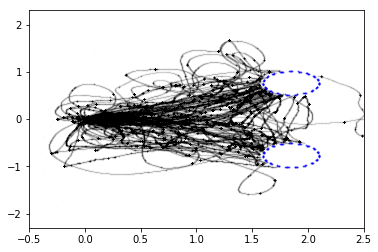

In [36]:
## df3 is original trajectories, df6 is noise reduced; only tra that FINISH at the post
ANGLE = np.round(angle_used*180/math.pi).astype(int)
print('angle between posts:', str(ANGLE))

now= datetime.now()
act_date = now.strftime('%Y-%m-%d')

#trajectories
color = 'black'  # speeds #
plt.scatter(np.array(df6)[50:,9], np.array(df6)[50:,10],c=color ,s=0.5, alpha=0.02)# s=0.0005, alpha=0.5) #c=speeds   'black'

if type(color) is np.ndarray:
    col_param = 'speed_col'    
else:
    col_param = 'black'
print(col_param)


#posts (approx size)
dot_x = math.cos(habp)*dist
dot_y = math.sin(habp)*dist
#plt.scatter(dot_x,dot_y, c='red', s=2900)
#plt.scatter(dot_x,-dot_y, c='blue', s=2900)

#limits of x and y axis
plt.xlim(-0.5,2.5)
plt.ylim(-2.3,2.3)
#appropriate size of posts in grey lines
plotting_angles = list(range(0,361,5))
ploX=[]
ploY=[]
plo=[np.linspace(0, 360, num=100)]
for i in range(0,100):
    ploX.extend([(math.cos(plo[0][i]))])
    ploY.extend([(math.sin(plo[0][i]))])
    plt.scatter((np.array(ploX)[i])*0.25+dot_x, np.array(ploY)[i]*0.25+dot_y, c='blue', s=1, alpha=0.5)
    plt.scatter((np.array(ploX)[i])*0.25+dot_x, np.array(ploY)[i]*0.25-dot_y, c='blue', s=1, alpha=0.5)
    
#act_date
filename = '/home/bianca/Documents/github/locustVR/plotting/'+str(ANGLE) + '_2post_no_noise'+ col_param +'_'+exper_date+'_'+'_all'+ '.png'
#filename = '/home/bianca/Documents/github/locustVR/plotting/'+str(ANGLE) + '_2post_'+ col_param +'_'+exper_date+'_'+tstart+ '.png'

#speeds[np.where(speeds>4)[0]] = 0
#fig.set_dpi(100)

plt.savefig(filename, dpi=(250))

In [37]:

xs = np.array(df6['x_rot'])
ys = np.array(df6['y_rot'])


In [116]:
nbins = 280      #bins 280, val 171      300,211  , 300 val=171,221
peak_threshold = 0.8
post0_x = dot_x
post0_y = -dot_y
post1_y = dot_y

def density_map(x, y, stats=True):

    val = 171#211 #201

    blur = (11,11) if stats == True else (val,val) #blur 11,11
    r = ([[0, post0_x], [post0_y, post1_y]])
    
    h, xedge, yedge, image = plt.hist2d(x, y, bins=nbins, normed=True, range=r)


    tmp_img = np.flipud(np.rot90(cv2.GaussianBlur(h, blur, 0)))
    for i in range(0, nbins):
        max_val = np.max(tmp_img[:, i])
        tmp_img[:, i] = tmp_img[:, i] / max_val

    return tmp_img

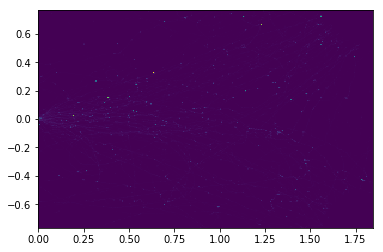

In [117]:
img = density_map(xs, ys, stats=False)


x_peaks = np.where(img > peak_threshold)[1] * post0_x / nbins
y_peaks = np.where(img > peak_threshold)[0] * (post0_y - post1_y) / nbins + post1_y

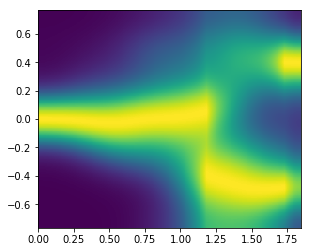

In [118]:
plt.imshow(img ** 2, extent=[0, post0_x, post0_y, post1_y])
filename = '/home/bianca/Documents/github/locustVR/plotting/'+str(ANGLE) + '_2post_twodb_'+str(nbins)+ '_'+exper_date+'_'+'heat'+ '.png'

plt.savefig(filename, dpi=(250))

NameError: name 'data' is not defined

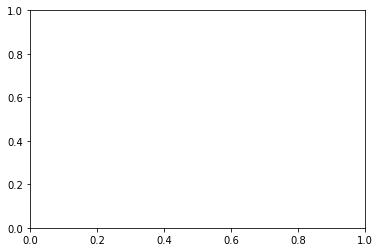

In [109]:


def forceAspect(ax,aspect=1):
    im = ax.get_images()
    extent =  im[0].get_extent()
    ax.set_aspect(abs((extent[5]-extent[1])/(extent[5]-extent[2]))/aspect)

#data = np.random.rand(0,2)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.imshow(data)
ax.set_xlabel('xlabel')
ax.set_aspect(1)
plt.scatter(np.array(rot)[50:,0], np.array(rot)[50:,1],c=color ,s=0.5, alpha=0.02)# s=0.0005, alpha=0.5) #c=speeds   'black'


In [240]:
speeds = np.array(d_v2)[:,0]

NameError: name 'd_v2' is not defined

In [233]:
#
speeds[np.where(speeds>4)[0]] = 0
speeds[np.where(speeds<0)[0]] = 0


NameError: name 'speeds' is not defined

In [234]:
len(speeds)

NameError: name 'speeds' is not defined

In [235]:
plt.hist(speeds)

NameError: name 'speeds' is not defined

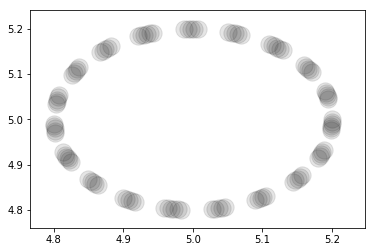

In [236]:
#dot plotting

plotting_angles = list(range(0,361,5))
ploX=[]
ploY=[]
plo=[np.linspace(0, 360, num=100)]
for i in range(0,100):
    ploX.extend([(math.cos(plo[0][i]))])
    ploY.extend([(math.sin(plo[0][i]))])
    plt.scatter((np.array(ploX)[i])*0.2+5, np.array(ploY)[i]*0.2+5, c='black', s=300, alpha=0.1)


In [237]:

df = pd.read_csv('/home/bianca/Documents/flyVR/vivek_data/new_experiments/0b4dc1ba-58fe-4452-9f75-630dd7cd07a8/results.csv')
df2 = pd.read_csv('/home/bianca/Documents/flyVR/vivek_data/new_experiments/0cac2ffa-751c-47e2-a60c-a4394f0c3694/results.csv')

df.columns = ['x', 'y', 'z', 'dir', 'cntr', 't', 'nStimuli']
df2.columns = ['x', 'y', 'z', 'dir', 'cntr', 't', 'nStimuli']
df=df.append(df2)

#df, df2

In [238]:
df4 = df[df['nStimuli'] == 4]
df4.head()

,x,y,z,dir,cntr,t,nStimuli
140543,0.953217,-1.785719,-0.07,5.1419,0,720.004008,4
140544,0.000859,-0.001949,-0.07,5.1273,0,720.010600,4
140545,0.000859,-0.001949,-0.07,5.1273,0,720.015738,4
140546,0.000859,-0.001949,-0.07,5.1013,0,720.020855,4
140547,0.000859,-0.001949,-0.07,5.1013,0,720.025957,4


# plotting speed

In [256]:
#taking unrotated x,y values from df3
#if df['nStimuli'][j]== stim:
#print(df3['y'][i])  
#i=10000 

#need of implementation speed in relation to post-distance or starting point distance. otherwise two different locusts 
#plotted on top of each other don't make sense. they need some synchronization which is post-distance?? 
#bifurcation point distance?
window = 50
d_v = []
for i in range(window,(len(df3))): #len(df3)
    d=((((df6['x'][i]-df6['x'][i-window])**2 + (df6['y'][i]-df6['y'][i-window])**2)**0.5)/(df6['t'][i]-df6['t'][i-window]))
    #if d != 0.0:
        #d_v=( )

#plt.scatter(np.array(rot)[:,0], np.array(rot)[:,1], c='black', s=1, alpha=0.01)
#plt.scatter(df4['x'], df4['y'], c='black', s=1, alpha=0.01)
    #speed relative to location on x
    d_v.extend([(d*100,df6['x'][i])]) # *100 to get cm/s
    #speed to time
    #d_v.extend([(d*100,df3['t'][i])]) # *100 to get cm/s


KeyError: 240664

In [246]:
#    rot.extend([(rotation(x,y,theta))])
d_v2 =[]
for i in range(window,(len(df6))): #len(df3)
    e=((((rot[i][0]-rot[i-window][0])**2 +       (rot[i][1]-rot[i-window][1]) **2)**0.5)/(df6['t'][i]-df6['t'][i-window]))
    #if d != 0.0:
        #d_v=( )
    d_v2.extend([(e*100,rot[i][0])])


IndexError: list index out of range

In [247]:
#color can get a list of colors to use for certain ID of the fly /locust

plt.scatter(np.array(d_v2)[50:8000,1], np.array(d_v2)[50:8000,0], c='black', s=0.1, alpha=1)
plt.ylim([0,4])

IndexError: too many indices for array

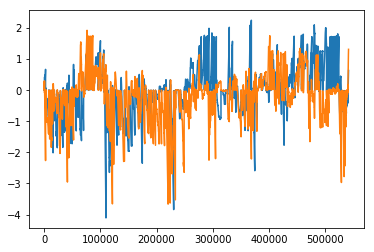

In [248]:
plt.plot(df3['x'][:])
plt.plot(df3['y'][:])
# plt.xlim([8700,11200])

In [252]:
xx = df6['x']
yy = df6['y']
distxxyy = np.sqrt(np.diff(xx)**2+np.diff(yy)**2)
speed = distxxyy/np.diff(tt)

NameError: name 'tt' is not defined

(array([167917.,  49528.,  55247.,  65220.,  66861.,  53375.,  37041.,
         21587.,  13322.,   6263.]),
 array([0.        , 0.0242068 , 0.04841361, 0.07262041, 0.09682721,
        0.12103401, 0.14524082, 0.16944762, 0.19365442, 0.21786123,
        0.24206803]),
 <a list of 10 Patch objects>)

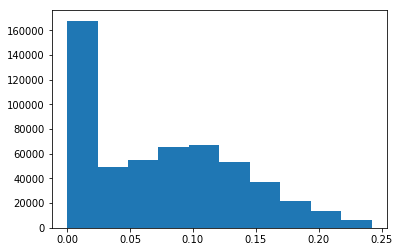

In [250]:
dt = 1/100.0
threshold = np.quantile(distxxyy,0.99)
plt.hist(distxxyy[distxxyy<threshold]/dt)

In [251]:
np.quantile(distxxyy,[0.95,0.99,1])

array([1.90819501e-03, 2.42071347e-03, 4.15778810e+00])

(array([2.00000e+00, 0.00000e+00, 2.00000e+00, 1.00000e+00, 7.00000e+00,
        2.00000e+00, 2.00000e+00, 2.40638e+05, 5.00000e+00, 4.00000e+00]),
 array([-2159.94011998, -1855.39758427, -1550.85504856, -1246.31251285,
         -941.76997714,  -637.22744143,  -332.68490572,   -28.14237001,
          276.4001657 ,   580.94270141,   885.48523712]),
 <a list of 10 Patch objects>)

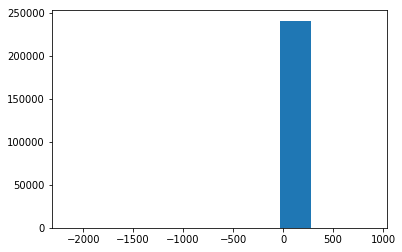

In [253]:
tt  = df6['t']
plt.hist(np.diff(tt))

In [254]:
np.quantile(np.diff(tt),[0.95,0.99,1])

array([5.08269970e-02, 5.95007970e-02, 8.85485237e+02])

In [255]:
threshold = np.quantile(speed,0.99)
plt.hist(speed[speed<threshold])

NameError: name 'speed' is not defined